In [1]:
%cd /content/drive/MyDrive/Data Mining/7. Random Forest and Driver Importance

/content/drive/MyDrive/Data Mining/7. Random Forest and Driver Importance


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset = pd.read_csv('Affairs dataset.csv')
dataset.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [18]:
#Isolate X and Y

X = dataset.iloc[:,2:]
y = dataset.iloc[:,1]
X.head()

y = np.where(y > 0, 1, 0)

In [20]:
X = pd.get_dummies(X, drop_first = True, columns=['occupation'])
X.head()

,gender,age,yearsmarried,children,religiousness,education,rating,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7
0,male,37.0,10.00,no,3,18,4,False,False,False,False,False,True
1,female,27.0,4.00,no,4,14,4,False,False,False,False,True,False
2,female,32.0,15.00,yes,1,12,4,False,False,False,False,False,False
3,male,57.0,15.00,yes,5,18,5,False,False,False,False,True,False
4,male,22.0,0.75,no,2,17,3,False,False,False,False,True,False


In [21]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,yearsmarried,religiousness,education,rating,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,gender_male,children_yes
0,37.0,10.00,3,18,4,False,False,False,False,False,True,True,False
1,27.0,4.00,4,14,4,False,False,False,False,True,False,False,False
2,32.0,15.00,1,12,4,False,False,False,False,False,False,False,True
3,57.0,15.00,5,18,5,False,False,False,False,True,False,True,True
4,22.0,0.75,2,17,3,False,False,False,False,True,False,True,False


In [22]:
#split into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1502, stratify = y)

X_train.head()

,age,yearsmarried,religiousness,education,rating,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,gender_male,children_yes
206,37.0,15.000,4,12,2,False,False,False,False,False,False,False,True
175,32.0,0.125,2,18,2,False,False,False,True,False,False,True,True
442,27.0,7.000,3,14,4,False,False,False,False,False,False,False,True
536,37.0,10.000,2,20,2,False,False,False,False,True,False,True,True
361,22.0,0.417,5,14,5,False,False,True,False,False,False,False,False


In [23]:
#RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

In [24]:
#Predictions
predictions = model.predict(X_test)
predictions[:20]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [25]:
#checking dataset balance
y_train.mean()

0.25

In [26]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        91
           1       0.46      0.20      0.28        30

    accuracy                           0.74       121
   macro avg       0.62      0.56      0.56       121
weighted avg       0.70      0.74      0.70       121



<Axes: >

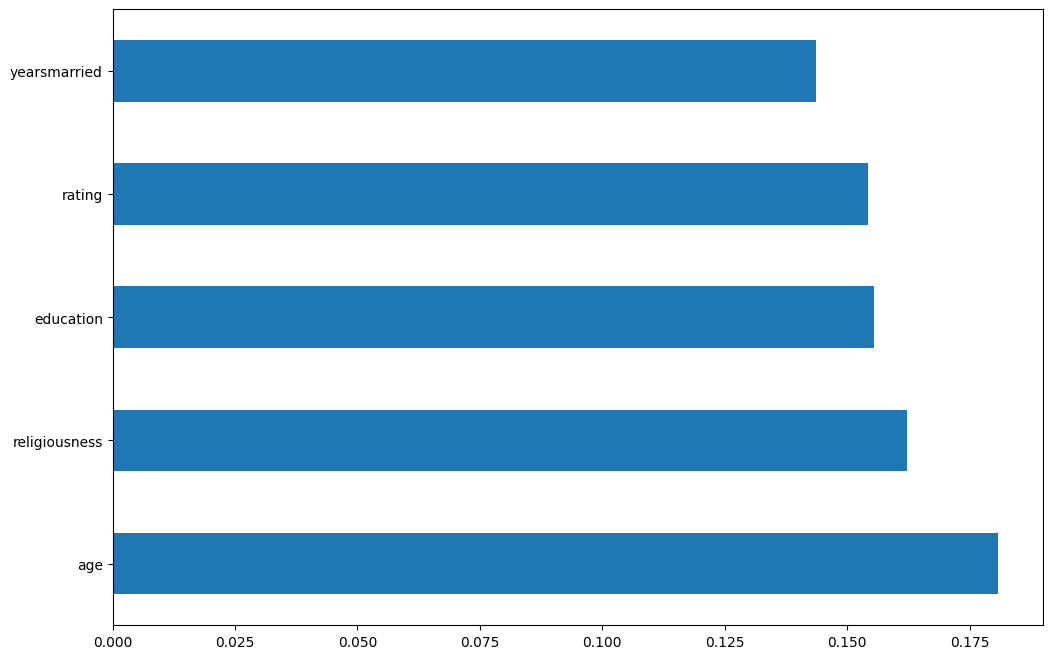

In [27]:
#Feature Importance

importance = pd.Series(model.feature_importances_, index = X_train.columns.values)

importance.nlargest(5).plot(kind = 'barh',figsize=(12,8))